<a href="https://colab.research.google.com/github/FedericoPes/MAGIC-Gamma-Telescope-Analysis-MML/blob/main/Magic_Tesina_MML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Magic GAMMA telescope

#Imports



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder, RobustScaler
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import recall_score as rec
from sklearn.metrics import  f1_score as f1
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV,StratifiedKFold
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report

#Data reading

In [ ]:
columns = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'label']
df=pd.read_csv('/content/drive/MyDrive/TesinaMML/magic04.csv', names=columns, header=None)

df.head(10)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,label
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,g
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,g
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,g
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,g


##Dataset exploring

##statistics

In [ ]:
df.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


##pairplot

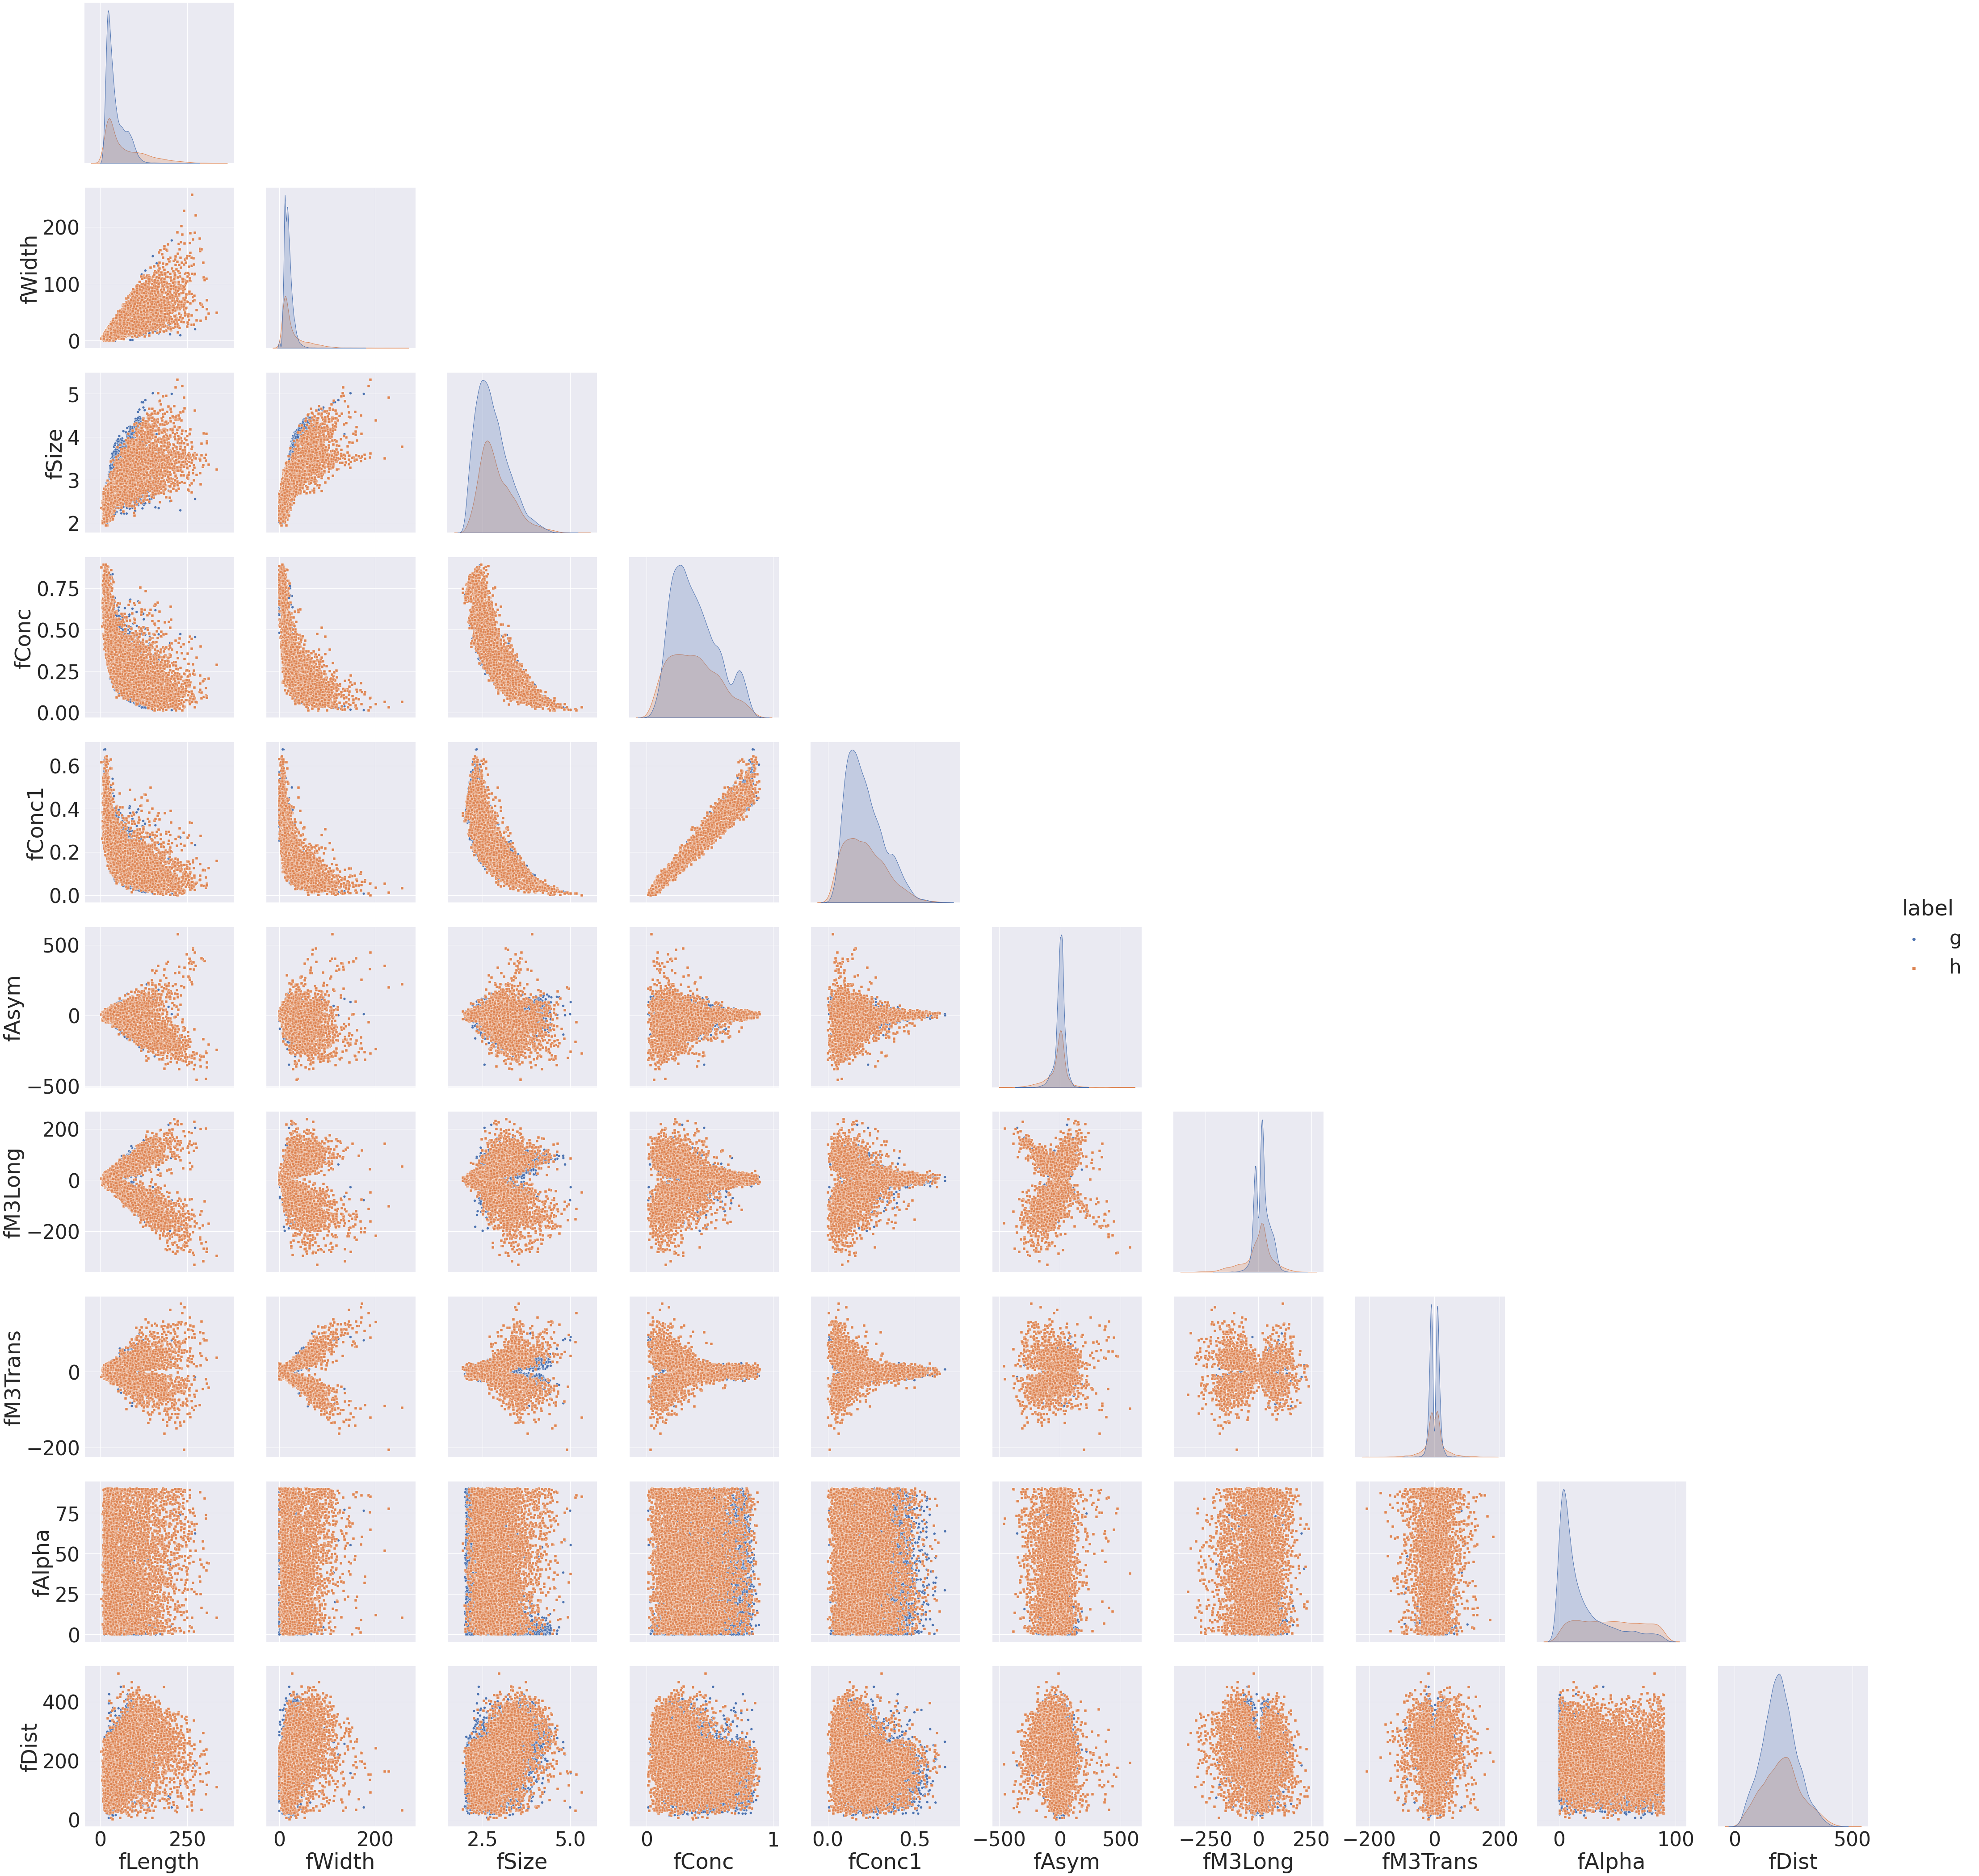

In [ ]:
sns.set(rc={'figure.figsize':(18,11)})
sns.set(font_scale=4)
x = sns.pairplot(df, hue="label", markers=["o", "s"], corner=True, height=6)
x.savefig('pairplot_features.png')
plt.show()

##Boxplot

Fare boxplot separati per label


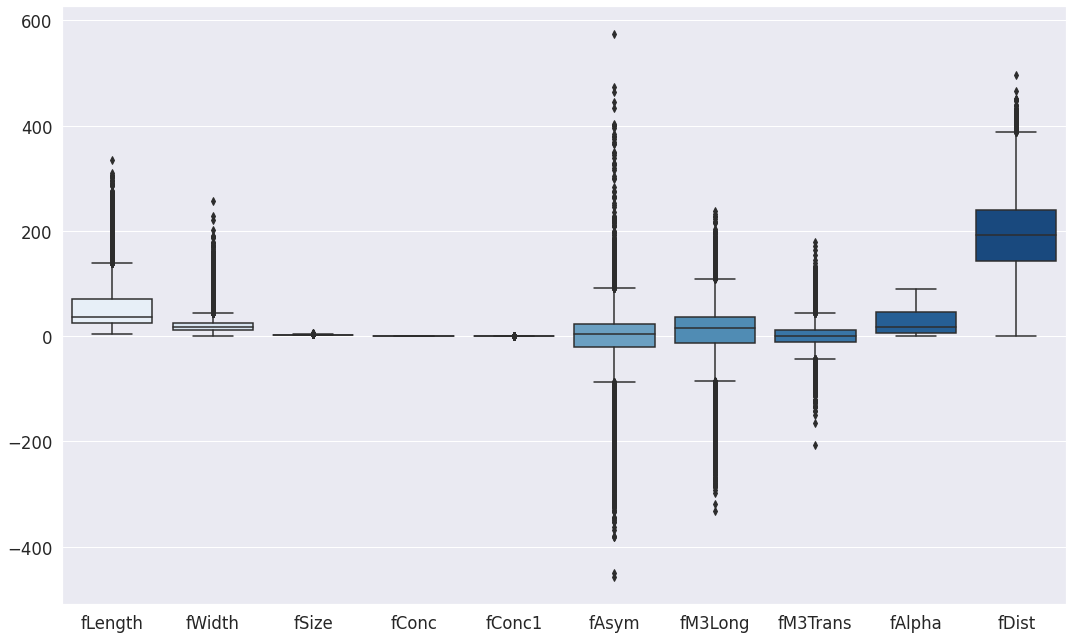

In [ ]:
sns.set(rc={'figure.figsize':(18,11)})
sns.set(font_scale=1.5)
x = sns.boxplot(data=df, orient="v", palette="Blues")
plt.savefig("boxplot.png",bbox_inches='tight')

##Correlation

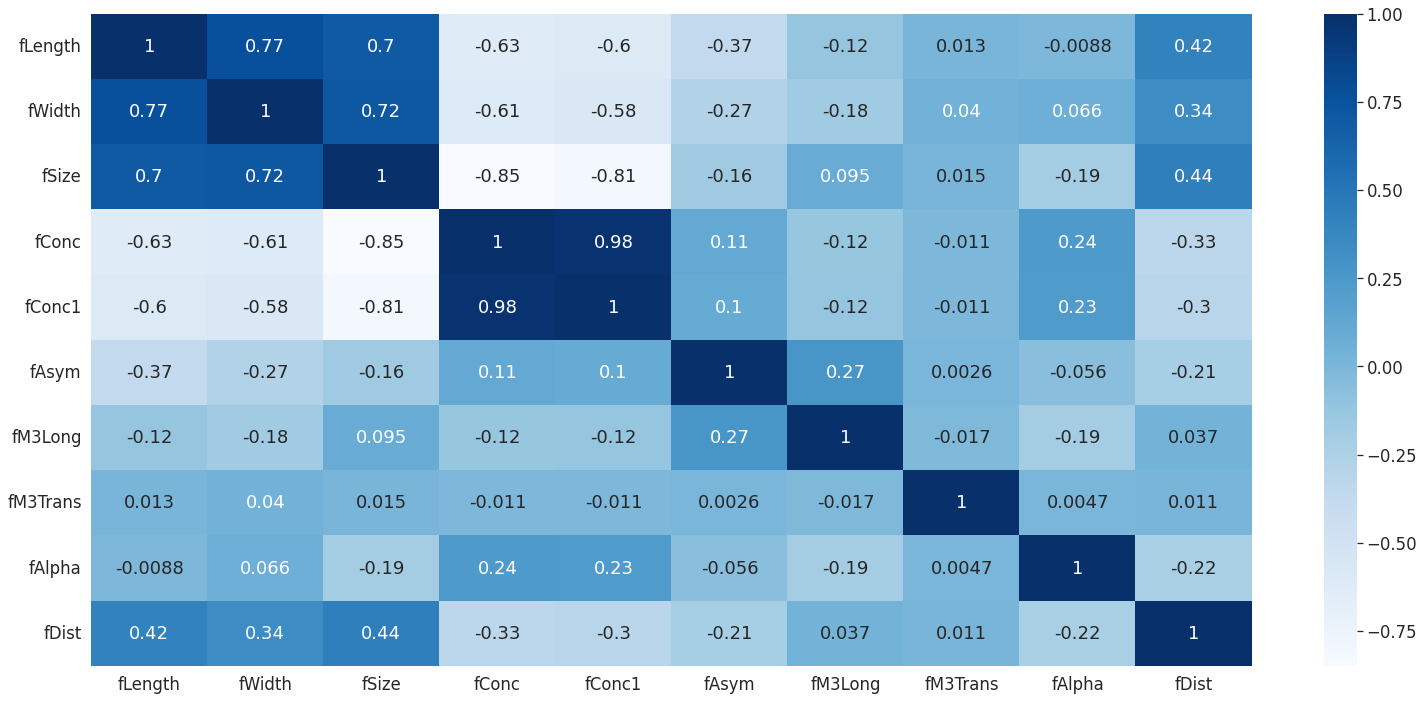

In [ ]:
corr = df.iloc[:,:-1].corr(method='pearson')
sns.set(rc={'figure.figsize':(26,12)})
sns.set(font_scale=1.5)
sns.heatmap(corr, annot=True,
        xticklabels=corr.columns,
        yticklabels=corr.columns,cmap='Blues')
plt.savefig("heatmap.png",bbox_inches='tight')

We can drop the column fConc1 as the information provided is highly correlated with the column fConc


In [ ]:
columns = ['fLength', 'fWidth', 'fSize', 'fConc', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'label']
df=df.drop(['fConc1'],axis=1)

##Data Balance

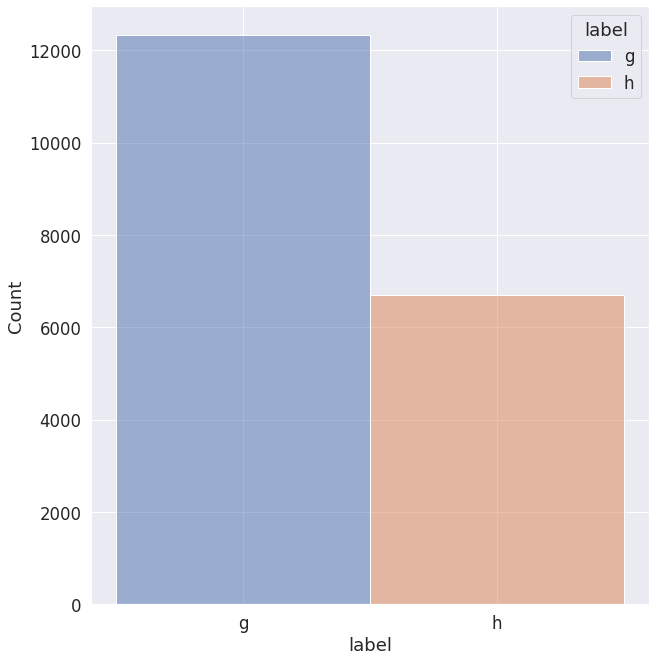

In [ ]:
sns.set(rc={'figure.figsize':(10,11)})
sns.set(font_scale=1.5)
x = sns.histplot(data=df, x="label", hue='label')
x.figure.savefig('classDistribution.pdf')

#Outliers detection and removal IQR


In [ ]:
def outliers(df,ft):

  Q1=df[ft].quantile(0.25)
  Q3=df[ft].quantile(0.75)

  IQR=Q3-Q1

  l_limit= Q1 - 1.5*IQR
  u_limit= Q3 + 1.5*IQR
  ls=df.index[ (df[ft]>u_limit) | (df[ft]<l_limit) ]
  
  return ls

In [ ]:
ls=[]
print(df.shape)

for c in columns[:-1]:
  ls.extend(outliers(df,c))

ls=sorted(set(ls))
df=df.drop(ls)
df.shape

(18905, 10)


(16059, 10)

#Outliers detection and removal Zscore

In [ ]:
def outliers(df,ft):

  mean=df[ft].mean()
  std=df[ft].std()
  df[ft]=(df[ft]-mean)/std
  ls=df.index[ (df[ft]>3) | (df[ft]<-3) ]
  
  return ls

In [ ]:
ls=[]
print(df.shape)

for c in columns[:-1]:
  ls.extend(outliers(df,c))

ls=sorted(set(ls))
df=df.drop(ls)
df.shape

#outlier removal LOF

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
local_outlier = LocalOutlierFactor(n_neighbors=20)

outlier_mask = local_outlier.fit_predict(df.iloc[:,:-1])

In [ ]:
mask = outlier_mask==1
df_masked = df[mask]

In [ ]:
(df.label == 'g').sum(), (df.label == 'h').sum()

(12332, 6688)

In [ ]:
(df_masked.label == 'g').sum(), (df_masked.label == 'h').sum()

(12273, 6502)

In [ ]:
(df.label == 'g').sum()-(df_masked.label == 'g').sum(), (df.label == 'h').sum()-(df_masked.label == 'h').sum()

(59, 186)

In [ ]:
df = df_masked

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18775 entries, 0 to 19019
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   18775 non-null  float64
 1   fWidth    18775 non-null  float64
 2   fSize     18775 non-null  float64
 3   fConc     18775 non-null  float64
 4   fAsym     18775 non-null  float64
 5   fM3Long   18775 non-null  float64
 6   fM3Trans  18775 non-null  float64
 7   fAlpha    18775 non-null  float64
 8   fDist     18775 non-null  float64
 9   label     18775 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#Encoding

In [ ]:
X = df.drop(['label'], axis=1)
y = df.label

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
print(le.inverse_transform([0]))

print(le.inverse_transform([1]))

['g']
['h']


#Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=42)

In [ ]:
X_train.shape

(13142, 9)

#Scale

In [ ]:
transformer=RobustScaler().fit(X_train)

In [ ]:
X_train=transformer.transform(X_train)
X_test=transformer.transform(X_test)

#PCA


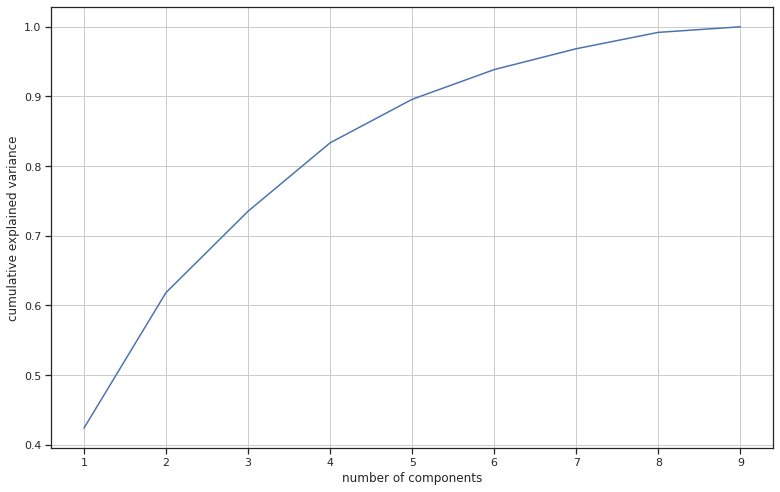

In [ ]:
from sklearn.decomposition import PCA
sns.set(rc={'figure.figsize':(11,7)})


sns.set(style="ticks")
plt.grid()

pca = PCA().fit(X_train)

x=sns.lineplot(x=[1,2,3,4,5,6,7,8,9,], y=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.tight_layout()
#x = sns.barplot(x=[1,2,3,4,5,6,7,8,9], y=pca.explained_variance_ratio_ )
x.figure.savefig("pca.png")

##fit transform

In [ ]:
pca = PCA(n_components=6, svd_solver='full')
pca.fit(X_train)

PCA(n_components=6, svd_solver='full')

In [ ]:
X_train_t=pca.transform(X_train)
X_test_t=pca.transform(X_test)

#SMOTE Oversampling over training

##Examples for data visualization

In [ ]:
#y_train1=y_train.reshape(y_train.size,1)

df_p=pd.concat([X_train,y_train],axis=1)

In [ ]:
df_p=pd.concat([df_p,y_train],axis=1)

In [ ]:
df_p.head

<bound method NDFrame.head of         fLength    fWidth     fSize     fConc     fAsym   fM3Long  fM3Trans  \
0      1.122573  0.346817  0.375920 -0.485460 -2.687088  0.686691  0.703284   
1     -0.309083 -1.349674 -1.104135  1.436185 -0.087221 -0.316043 -0.524093   
2     -0.292939  0.183331 -0.152601  0.012716  0.337035 -0.033133 -0.243361   
3      0.139040  1.431345  1.429242 -0.614867 -0.140758 -1.091685  0.853967   
4     -0.404047 -0.541793 -0.816085  0.855353  0.399815 -0.070433 -0.030702   
...         ...       ...       ...       ...       ...       ...       ...   
19011       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
19012       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
19013       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
19014       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
19018       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

         fAlpha     f

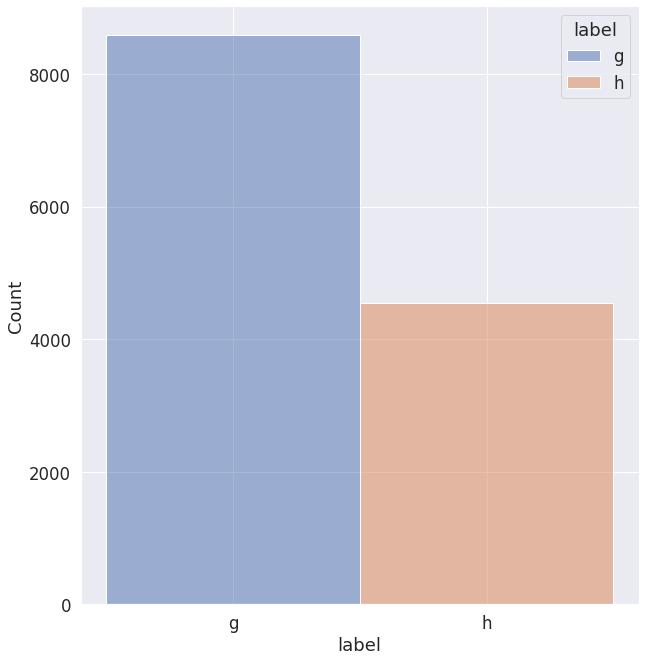

In [ ]:
sns.set(rc={'figure.figsize':(10,11)})
sns.set(font_scale=1.5)
x = sns.histplot(data=df_p, x="label", hue='label')
x.figure.savefig('classDistribution1.pdf')

In [ ]:
!sudo pip install imbalanced-learn
from imblearn.over_sampling import SMOTEN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
s=SMOTEN()

In [ ]:
sampler = SMOTEN()
X_train_s, y_train_s = sampler.fit_resample(X_train, y_train)

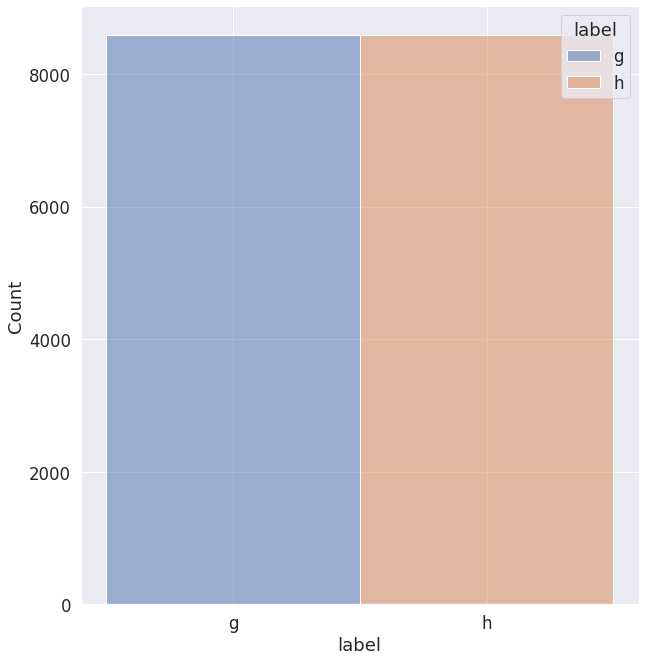

In [ ]:
df_p=pd.concat([X_train,y_train],axis=1)
sns.set(rc={'figure.figsize':(10,11)})
sns.set(font_scale=1.5)
x = sns.histplot(data=df_p, x="label", hue='label')
x.figure.savefig('classDistribution2.pdf')

##unire x e y train e fare plot

In [ ]:
sns.set(rc={'figure.figsize':(10,11)})
sns.set(font_scale=1.5)
x = sns.histplot(data=df, x="label", hue='label')
x.figure.savefig('classDistribution.pdf')

#Stratified K-fold

In [ ]:
split = StratifiedKFold(n_splits=10,shuffle=True)
split.get_n_splits(X_train, y_train)


10

In [ ]:
split_pca = StratifiedKFold(shuffle=True,n_splits=10,)
split_pca.get_n_splits(X_train_t, y_train)


10

#Models

##SVM

In [ ]:
model_s= SVC()
pipeline_svm = imbpipeline(steps = [['smote', SMOTE()],['classifier', model_s]])
params= {"classifier__gamma":["auto","scale"], "classifier__kernel":["linear","rbf","poly"],'classifier__C': [0.6, 0.8, 1.0, 1.2, 1.5]}

In [ ]:
grid_svm = GridSearchCV(estimator=pipeline_svm, scoring='f1', param_grid=params, cv=split, refit=True)
search_svm = grid_svm.fit(X_train, y_train)

In [ ]:
print(search_svm.best_score_, search_svm.best_params_)

0.8028338133429875 {'classifier__C': 1.5, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}


'classifier__C': 1.5, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'

In [ ]:
y_p=search_svm.predict(X_test)
print(acc(y_test,y_p))
print(rec(y_test,y_p))
print(f1(y_test,y_p))


0.8665009763891355
0.805740645822655
0.8069815195071869


In [ ]:
print(classification_report(y_test, search_svm.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3682
           1       0.81      0.81      0.81      1951

    accuracy                           0.87      5633
   macro avg       0.85      0.85      0.85      5633
weighted avg       0.87      0.87      0.87      5633



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix SVM best estimator')

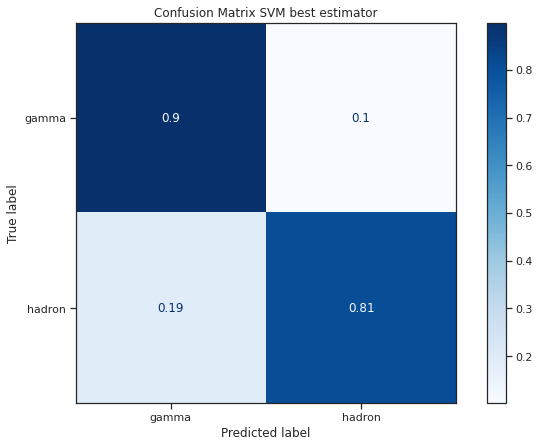

In [ ]:
disp_rf = plot_confusion_matrix(search_svm.best_estimator_, X_test, y_test,
                                display_labels=['gamma', 'hadron'],
                                cmap=plt.cm.Blues,
                                normalize='true')
plt.title('Confusion Matrix SVM best estimator')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Roc curve SVM best estimator')

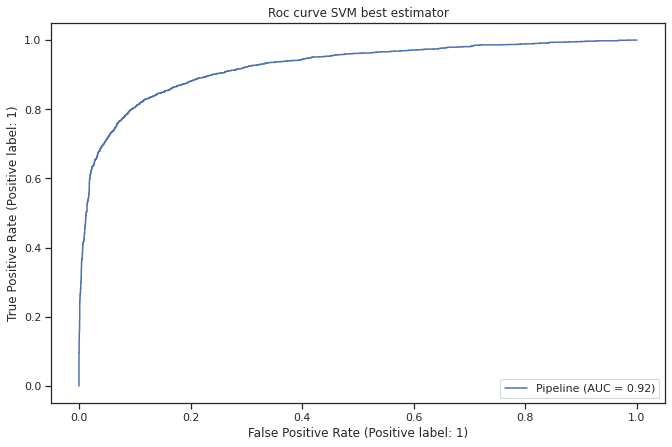

In [ ]:
x = plot_roc_curve(search_svm.best_estimator_, X_test, y_test) 
plt.title('Roc curve SVM best estimator')

##Logistic Regression 

In [ ]:
model_lr = LogisticRegression()
pipeline_lr = imbpipeline(steps = [['smote', SMOTE()],['classifier', model_lr]])
params={ "classifier__penalty": [ "l1", "l2"], "classifier__C":[ 0.8, 1.0, 1.2, 1.5], 'classifier__solver': ['liblinear']}

In [ ]:
grid_lr = GridSearchCV(estimator=pipeline_lr, scoring='f1', param_grid=params, cv=split,refit=True)
search_lr = grid_lr.fit(X_train, y_train)

In [ ]:
print(search_lr.best_score_, search_lr.best_params_)

0.6963649698219068 {'classifier__C': 1.0, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}


In [ ]:
y_p=search_lr.predict(X_test)
print(acc(y_test,y_p))
print(rec(y_test,y_p))
print(f1(y_test,y_p))


0.7922954020947985
0.7355202460276781
0.7103960396039604


In [ ]:
print(classification_report(y_test, search_lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      3682
           1       0.69      0.74      0.71      1951

    accuracy                           0.79      5633
   macro avg       0.77      0.78      0.77      5633
weighted avg       0.80      0.79      0.79      5633



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix Logistic Regression best estimator')

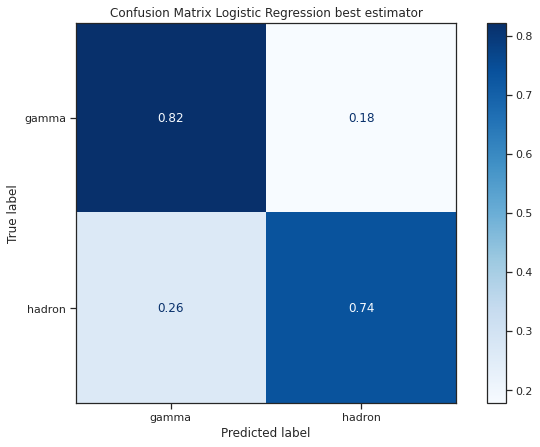

In [ ]:
disp_rf = plot_confusion_matrix(search_lr, X_test, y_test,
                                display_labels=['gamma', 'hadron'],
                                cmap=plt.cm.Blues,
                                normalize='true')
plt.title('Confusion Matrix Logistic Regression best estimator')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Roc curve Logistic Regression best estimator')

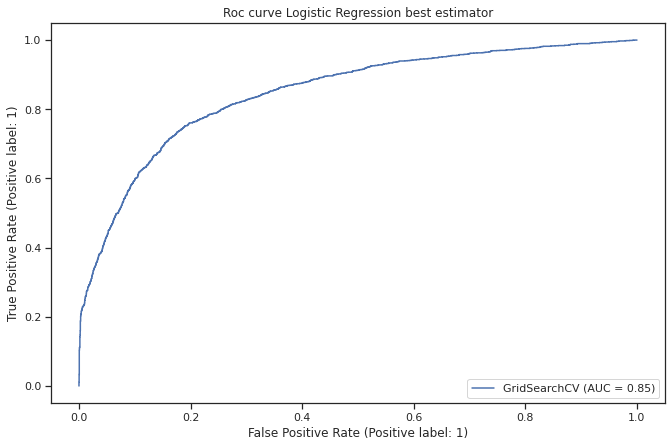

In [ ]:
x = plot_roc_curve(search_lr, X_test, y_test) 
plt.title('Roc curve Logistic Regression best estimator')

##Random Forest

In [ ]:
model_rf = RandomForestClassifier()

In [ ]:
pipeline_rf = imbpipeline(steps = [['smote', SMOTE()],
                                   ['classifier', model_rf]])  
params={"classifier__n_estimators": [50, 100, 150, 200], "classifier__criterion" : ["gini", "entropy"], "classifier__max_depth" : [10,20,50]}

In [ ]:
grid_rf = GridSearchCV(estimator=pipeline_rf, scoring='f1', param_grid=params, cv=split,refit=True)
search_rf = grid_rf.fit(X_train, y_train)

In [ ]:
print(search_rf.best_score_, search_rf.best_params_)

0.8123759314571194 {'classifier__criterion': 'gini', 'classifier__max_depth': 50, 'classifier__n_estimators': 100}


In [ ]:
y_p=search_rf.best_estimator_.predict(X_test)
print(acc(y_test,y_p))
print(rec(y_test,y_p))
print(f1(y_test,y_p))


0.8751997159595243
0.8108662224500256
0.8182053271269718


In [ ]:
print(classification_report(y_test, search_rf.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      3682
           1       0.83      0.81      0.82      1951

    accuracy                           0.88      5633
   macro avg       0.86      0.86      0.86      5633
weighted avg       0.87      0.88      0.87      5633



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix Random Forest best estimator')

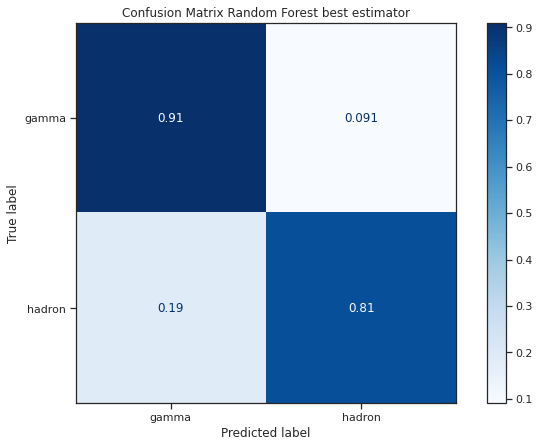

In [ ]:
disp_rf = plot_confusion_matrix(search_rf.best_estimator_, X_test, y_test,
                                display_labels=['gamma', 'hadron'],
                                cmap=plt.cm.Blues,
                                normalize='true')
plt.title('Confusion Matrix Random Forest best estimator')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Roc curve Random Forest best estimator')

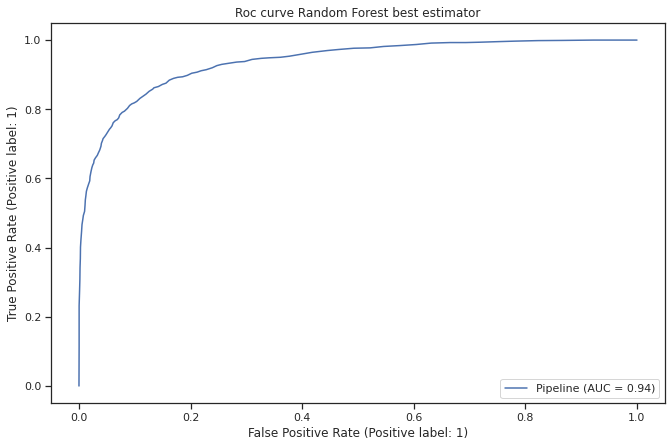

In [ ]:
x = plot_roc_curve(search_rf.best_estimator_, X_test, y_test) 
plt.title('Roc curve Random Forest best estimator')

#Models PCA


##SVM

In [ ]:
model_s= SVC()
pipeline_svm = imbpipeline(steps = [['smote', SMOTE()],['classifier', model_s]])
params= {"classifier__gamma":["auto","scale"], "classifier__kernel":["linear","rbf","poly"],'classifier__C': [0.6, 0.8, 1.0, 1.2, 1.5]}

In [ ]:
grid_svm = GridSearchCV(estimator=pipeline_svm, scoring='f1', param_grid=params, cv=split_pca, refit=True)
search_svm = grid_svm.fit(X_train_t, y_train)

In [ ]:
print(search_svm.best_score_, search_svm.best_params_)

0.7074727126148381 {'classifier__C': 1.0, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}


In [ ]:
y_p=search_svm.predict(X_test_t)
print(acc(y_test,y_p))
print(rec(y_test,y_p))
print(f1(y_test,y_p))


0.7985087875022191
0.7401332649923117
0.7178722346507582


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix SVM_pca best estimator')

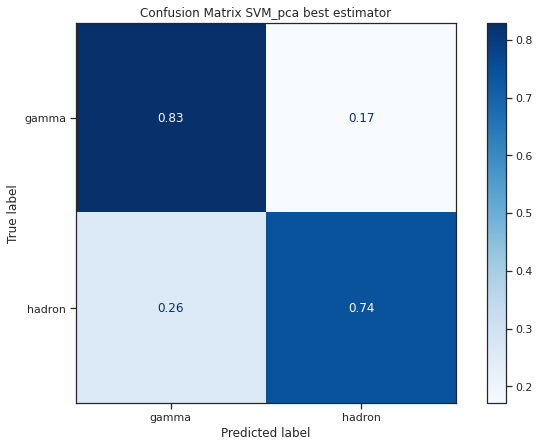

In [ ]:
disp_rf = plot_confusion_matrix(search_svm.best_estimator_, X_test_t, y_test,
                                display_labels=['gamma', 'hadron'],
                                cmap=plt.cm.Blues,
                                normalize='true')
plt.title('Confusion Matrix SVM_pca best estimator')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Roc curve SVM_pca best estimator')

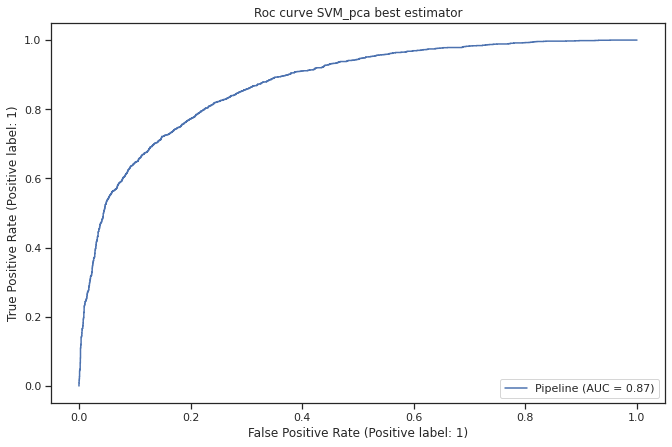

In [ ]:
x = plot_roc_curve(search_svm.best_estimator_, X_test_t, y_test) 
plt.title('Roc curve SVM_pca best estimator')

##Logistic Regression 

In [ ]:
model_lr = LogisticRegression()
pipeline_lr = imbpipeline(steps = [['smote', SMOTE()],['classifier', model_lr]])
params={ "classifier__penalty": [ "l1", "l2"], "classifier__C":[0.6, 0.8, 1.0, 1.2, 1.5], 'classifier__solver': ['liblinear']}

In [ ]:
grid_lr = GridSearchCV(estimator=pipeline_lr, scoring='f1', param_grid=params, cv=split_pca,refit=True)
search_lr = grid_lr.fit(X_train_t, y_train)

In [ ]:
print(search_lr.best_score_, search_lr.best_params_)

0.6622137688018513 {'classifier__C': 1.2, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}


In [ ]:
y_p=search_lr.predict(X_test_t)
print(acc(y_test,y_p))
print(rec(y_test,y_p))
print(f1(y_test,y_p))


0.7661991833836321
0.6950281906714505
0.673119880863738


In [ ]:
print(classification_report(y_test, search_lr.predict(X_test_t)))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      3682
           1       0.65      0.70      0.67      1951

    accuracy                           0.77      5633
   macro avg       0.74      0.75      0.75      5633
weighted avg       0.77      0.77      0.77      5633



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix Logistic Regression_pca best estimator')

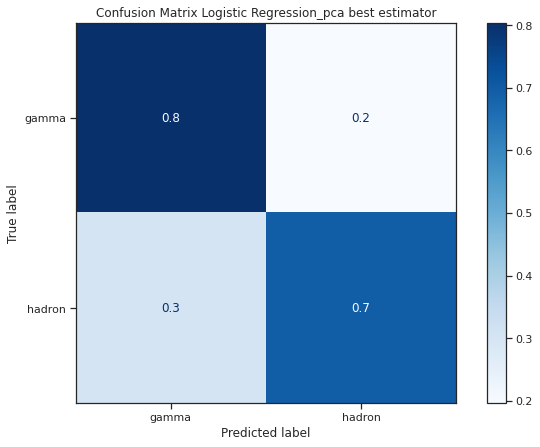

In [ ]:
disp_rf = plot_confusion_matrix(search_lr, X_test_t, y_test,
                                display_labels=['gamma', 'hadron'],
                                cmap=plt.cm.Blues,
                                normalize='true')
plt.title('Confusion Matrix Logistic Regression_pca best estimator')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Roc curve Logistic Regression_pca best estimator')

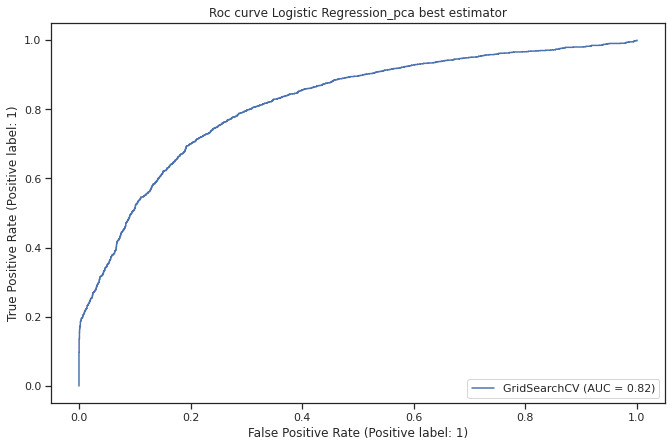

In [ ]:
x = plot_roc_curve(search_lr, X_test_t, y_test) 
plt.title('Roc curve Logistic Regression_pca best estimator')

##Random Forest

In [ ]:

model_rf = RandomForestClassifier()

In [ ]:
pipeline_rf = imbpipeline(steps = [['smote', SMOTE()],
                                   ['classifier', model_rf]])  
params={"classifier__n_estimators": [50, 100, 150, 200], "classifier__criterion" : ["gini", "entropy"], "classifier__max_depth" : [10,20,50]}

In [ ]:
grid_rf = GridSearchCV(estimator=pipeline_rf, scoring='f1', param_grid=params, cv=split_pca,refit=True)
search_rf = grid_rf.fit(X_train_t, y_train)

In [ ]:
print(search_rf.best_score_, search_rf.best_params_)

0.7086195979420336 {'classifier__criterion': 'entropy', 'classifier__max_depth': 50, 'classifier__n_estimators': 100}


In [ ]:
y_p=search_rf.best_estimator_.predict(X_test_t)
print(acc(y_test,y_p))
print(rec(y_test,y_p))
print(f1(y_test,y_p))


0.8040120717202202
0.7175807278318811
0.7172131147540984


In [ ]:
print(classification_report(y_test, search_rf.best_estimator_.predict(X_test_t)))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      3682
           1       0.72      0.72      0.72      1951

    accuracy                           0.80      5633
   macro avg       0.78      0.78      0.78      5633
weighted avg       0.80      0.80      0.80      5633



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix Random Forest_pca best estimator')

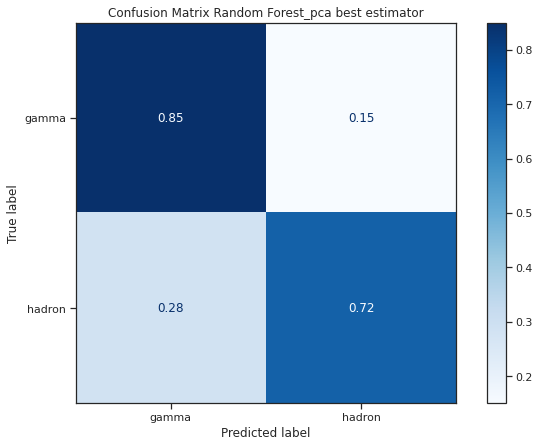

In [ ]:
disp_rf = plot_confusion_matrix(search_rf.best_estimator_, X_test_t, y_test,
                                display_labels=['gamma', 'hadron'],
                                cmap=plt.cm.Blues,
                                normalize='true')
plt.title('Confusion Matrix Random Forest_pca best estimator')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Roc curve Random Forest_pca best estimator')

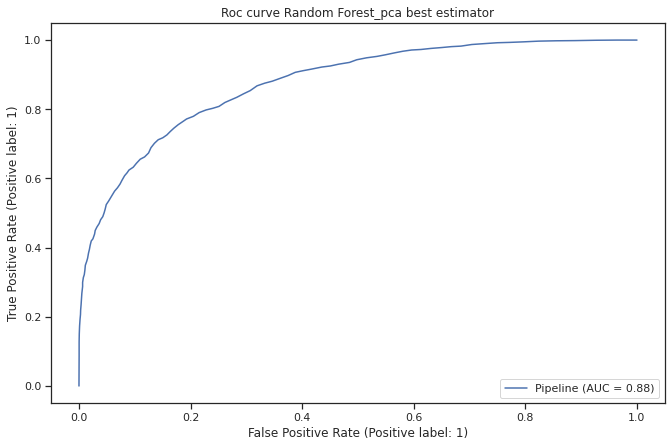

In [ ]:
x = plot_roc_curve(search_rf.best_estimator_, X_test_t, y_test) 
plt.title('Roc curve Random Forest_pca best estimator')